<a href="https://colab.research.google.com/github/Mlamalerie/Diabetes-prediction/blob/main/Diabetes_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [424]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [425]:
WORKSPACE_PATH = "/content/gdrive/Shareddrives/ING3 (2022-23) Mlamali/22 • Big Data/Project Evaluation ML"

# Diabetes Prediction

> Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.


Can you build a machine learning model to accurately **predict whether or not the patients in the dataset have diabetes or not?**


## Import librairies

In [426]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [427]:
import pandas as pd 
import numpy as np

import seaborn as sns # library for visualization
import matplotlib.pyplot as plt # library for visualization
%matplotlib inline

In [428]:
import warnings
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
warnings.filterwarnings("ignore")

import plotly
plotly.__version__

'5.13.0'

In [429]:
from IPython.display import Image

## 📁 The Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Read
load diabetes.csv

In [430]:
df_diabetes = pd.read_csv(f"{WORKSPACE_PATH}/diabetes.csv")
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


### Infos

In [431]:
df_diabetes.shape

(768, 9)

In [432]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Les colonnes incluses dans ce jeu de données sont les suivantes :

1. Pregnancies : Nombre de grossesses
2. Glucose : Taux de glucose plasmatique à 2 heures dans un test de tolerance au glucose
3. BloodPressure : Pression sanguine (mm Hg)
4. SkinThickness : Épaisseur cutanée (mm)
5. Insulin : Taux sérique d'insuline (mu U/ml)
6. BMI : Indice de masse corporelle (poids en kg / (taille en m)^2)
7. DiabetesPedigreeFunction : Fonction de pedigree de diabète
8. Age : Âge (années)
9. Outcome : Résultat du test de diabète (0 = pas de diabète, 1 = diabète)

In [433]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Missing Values

Now let us check for missing values.

In [434]:
df_diabetes.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [435]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


On remarque des valeurs nulle (=0), c'est illogique.

However the dataset shows some of the features having minimum value as 0 like insulin,BMI,glucose which is not logical and can be considered missing values

In [436]:
df_diabetes.loc[df_diabetes["Glucose"]==0,"Glucose"]

75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64

In [437]:
columns_with_missing_vals = []
total_ms_vals = 0
for column in df_diabetes.columns[:-1]:
    ms_vals = len(df_diabetes.loc[df_diabetes[column]==0,column])
    total_ms_vals += ms_vals
    print(f"{ms_vals/len(df_diabetes[column]):>5.1%} of Missing values for {column} ({ms_vals} values)")
    if ms_vals > 0:
        columns_with_missing_vals.append(column)

print(f"------\nTotal : {total_ms_vals}/{df_diabetes.size} -> {total_ms_vals/df_diabetes.size:.0%}")


14.5% of Missing values for Pregnancies (111 values)
 0.7% of Missing values for Glucose (5 values)
 4.6% of Missing values for BloodPressure (35 values)
29.6% of Missing values for SkinThickness (227 values)
48.7% of Missing values for Insulin (374 values)
 1.4% of Missing values for BMI (11 values)
 0.0% of Missing values for DiabetesPedigreeFunction (0 values)
 0.0% of Missing values for Age (0 values)
------
Total : 763/6912 -> 11%


we will be imputing these missing values with the mean with help of sklearn imputer

In [438]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=0, strategy="mean")
df_diabetes_0_meaned = df_diabetes.copy()
df_diabetes_0_meaned.loc[:,columns_with_missing_vals]= impute.fit_transform(df_diabetes.loc[:,columns_with_missing_vals])
df_diabetes_0_meaned.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,4.49,121.69,72.41,29.15,155.55,32.46,0.47,33.24,0.35
std,2.98,30.44,12.10,8.79,85.02,6.88,0.33,11.76,0.48
min,1.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,2.00,99.75,64.00,25.00,121.50,27.50,0.24,24.00,0.00
50%,4.49,117.00,72.20,29.15,155.55,32.40,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,155.55,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


All the zero values have been imputed



In [439]:
cols = df_diabetes.columns[:-1]
df_diabetes_0_dropped = df_diabetes[~(df_diabetes[cols] == 0).any(axis=1)]
df_diabetes_0_dropped.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,336.00,336.00,336.00,336.00,336.00,336.00,336.00,336.00,336.00
mean,3.85,122.28,70.24,28.66,155.35,32.30,0.52,31.84,0.33
std,3.15,30.78,12.36,10.25,118.78,6.37,0.33,10.46,0.47
min,1.00,56.00,24.00,7.00,15.00,18.20,0.09,21.00,0.00
25%,1.00,99.00,62.00,21.00,76.00,27.80,0.27,24.00,0.00
50%,3.00,119.00,70.00,28.50,125.50,32.75,0.45,28.00,0.00
75%,6.00,144.00,78.00,36.00,190.00,36.25,0.69,38.00,1.00
max,17.00,197.00,110.00,52.00,846.00,57.30,2.33,81.00,1.00


#### Choose a processed dataset

In [440]:
df_diabetes = df_diabetes_0_meaned
df_diabetes.shape

(768, 9)

## 📊 EDA

In statistics, exploratory data analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods

### Outcome Distribution
lets see the distribution of Outcome(diabetes or not)

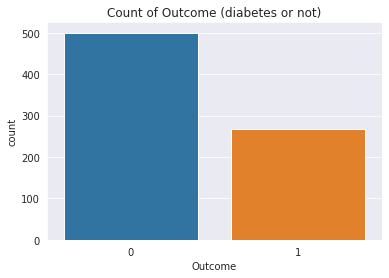

In [441]:
sns.countplot(x='Outcome', data=df_diabetes)
plt.title("Count of Outcome (diabetes or not)")
plt.show()

In [442]:
ax= px.pie(df_diabetes, names= "Outcome",title= "Distribution of Diabetes",hole= 0.65)
ax.show()

The dataset is slightly imbalanced wrt to outcome as 65% of patients have low of diabetes and only 34% patients have high chance.  

**[](go)**

### Correlation 

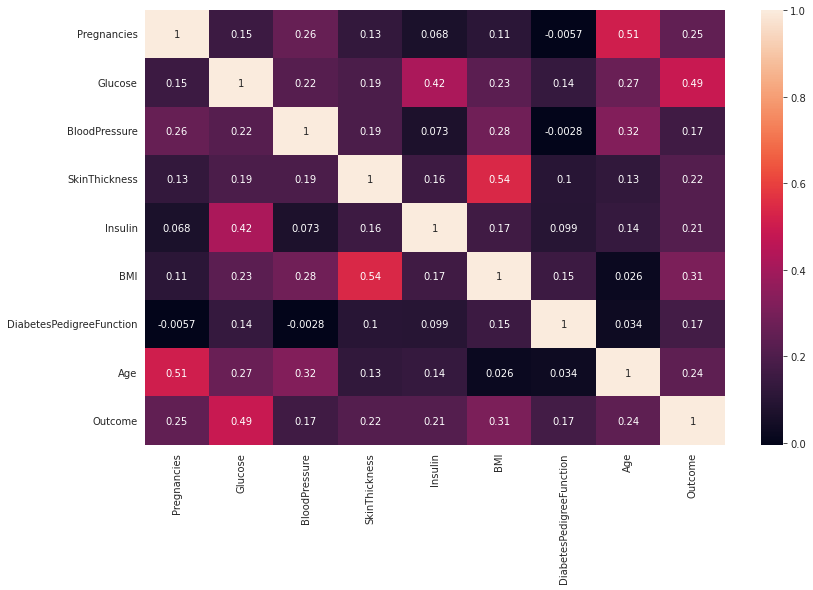

In [443]:
plt.figure(figsize= (13,8))
sns.set_style("darkgrid")
sns.heatmap(df_diabetes.corr(),annot= True)
plt.show()

In [444]:
# Calculer la matrice de corrélation
correlation_matrix = df_diabetes.corr()
columns_to_drop = []
# Boucle sur les colonnes de la matrice de corrélation
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # Si la corrélation est supérieure à 0,9
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            columns_to_drop.append(correlation_matrix.columns[j]) 

columns_to_drop

[]

### Age Distribution

lets see the distribution of age across dataset

In [445]:
ax= px.histogram(df_diabetes,x= "Age",color= "Outcome",title='Age distribution')
ax.show()

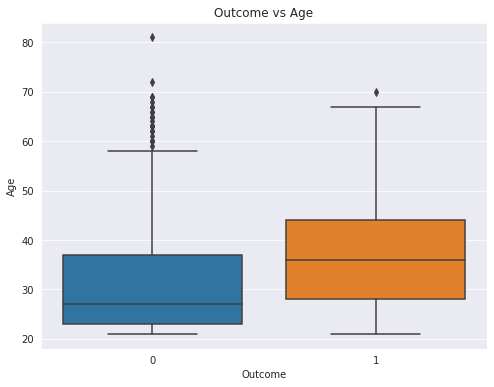

In [446]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.boxplot(x='Outcome',y='Age', data=df_diabetes)
#ax.set_ylim(0,300)
plt.title("Outcome vs Age")
plt.show()

### Glucode + Age

Glucose and age correlation/ distribution across target variable

In [447]:
ax= px.scatter(df_diabetes,x= "Glucose",y= "Age",marginal_x='histogram', marginal_y='histogram',size="Age", size_max=8,color= "Outcome",title="Age and Glucose correlation")
ax.show()

### Blood pressure + Age 
blood pressure and age correlation/ distribution across target variable

In [448]:
ax= px.scatter(df_diabetes,x= "BloodPressure",y= "Age",marginal_x='histogram', marginal_y='histogram',size="Age", size_max=8,color= "Outcome",title="Age and Glucose correlation")
ax.show()

### Insuline + Age

Insulin and age correlation/ distribution across target variable

In [449]:
ax= px.scatter(df_diabetes,x= "Insulin",y= "Age",marginal_x='histogram', marginal_y='histogram',size="Age", size_max=8,color= "Outcome",title="Age and Glucose correlation")
ax.show()

### Insulin  + Glucose + Age

3D scatterplot showing correlation between insulin and glucose across ages and it impacts the target variable

In [450]:
ax = px.scatter_3d(df_diabetes, x="Age", y="Glucose", z="Insulin",template= "plotly_dark",color="Outcome")
ax.show()

### BMI + Diabetes pedigree function

Visualizing the BMI and diabetes pedigree function


In [451]:
fig = px.area(df_diabetes, x="Age", y="BMI", color="Outcome")
fig.show()

In [452]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [453]:
ax = px.box(df_diabetes.iloc[:,1:-1],template= "plotly_dark")
ax.show()

In [454]:
ax= px.parallel_coordinates(df_diabetes.loc[:,["BMI", 'DiabetesPedigreeFunction',"Outcome"]], color="Outcome")
ax.show()
plt.show()

## 🔥 Model Building 

In [455]:
#importing essential libraries
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [456]:
models_metrics_results = []

### Preprocessing

In [457]:
df_diabetes.var()

Pregnancies                   8.85
Glucose                     926.35
BloodPressure               146.32
SkinThickness                77.28
Insulin                    7228.59
BMI                          47.27
DiabetesPedigreeFunction      0.11
Age                         138.30
Outcome                       0.23
dtype: float64

In [458]:
df_diabetes.mean()

Pregnancies                  4.49
Glucose                    121.69
BloodPressure               72.41
SkinThickness               29.15
Insulin                    155.55
BMI                         32.46
DiabetesPedigreeFunction     0.47
Age                         33.24
Outcome                      0.35
dtype: float64

The features have high variance and hence need to be normalized

In [459]:
from sklearn.preprocessing import MinMaxScaler
# Instancier un objet MinMaxScaler
scaler = MinMaxScaler()
cols_to_normalize = df_diabetes.columns[:-1]
# Normaliser les données en utilisant le fit_transform de MinMaxScaler
df_diabetes[cols_to_normalize] = scaler.fit_transform(df_diabetes[cols_to_normalize])

In [460]:
df_diabetes.var()

Pregnancies                0.03
Glucose                    0.04
BloodPressure              0.02
SkinThickness              0.01
Insulin                    0.01
BMI                        0.02
DiabetesPedigreeFunction   0.02
Age                        0.04
Outcome                    0.23
dtype: float64

In [461]:
df_diabetes.mean()

Pregnancies                0.22
Glucose                    0.50
BloodPressure              0.49
SkinThickness              0.24
Insulin                    0.17
BMI                        0.29
DiabetesPedigreeFunction   0.17
Age                        0.20
Outcome                    0.35
dtype: float64

### Train Test Split

In [462]:
label= df_diabetes["Outcome"]
train= df_diabetes.drop("Outcome",axis= 1)
x_train,x_test,y_train,y_test= train_test_split(train,label,test_size= 0.25,random_state= 123)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(576, 8)
(576,)
(192, 8)
(192,)


### 🔨 Fix Imbalencement data

- https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset 
- https://towardsdatascience.com/heres-what-i-ve-learnt-about-sklearn-resample-ab735ae1abc4


In a Machine Learning problem, make sure to upsample/downsample ONLY AFTER you split into train, test (and validate if you wish). If you do upsample your dataset before you split into train and test, there is a high possibility that your model is exposed to data leakage. Doing this might give us a wrong sense of what our Machine Learning model is really performing.

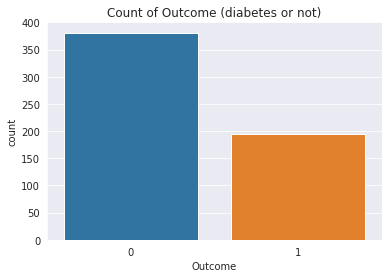

In [463]:

df_diabetes_train = pd.concat([x_train,y_train],axis=1)
sns.countplot(x='Outcome', data=df_diabetes_train)
plt.title("Count of Outcome (diabetes or not)")
plt.show()

In [464]:
# Séparer les lignes en deux groupes en fonction de la valeur de la colonne "Outcome"
df_minority = df_diabetes_train[df_diabetes_train['Outcome']==1]
df_majority = df_diabetes_train[df_diabetes_train['Outcome']==0]

df_minority.shape[0],df_majority.shape[0]

(195, 381)

In [465]:

from sklearn.utils import resample
# Effectuer la data augmentation en dupliquant aléatoirement les lignes du groupe minoritaire jusqu'à ce qu'il ait le même nombre de lignes que le groupe majoritaire
df_minority_upsampled = resample(df_minority,replace=True, n_samples=len(df_majority) - len(df_minority), random_state=123)

df_minority_upsampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
702,0.00,0.80,0.65,0.24,0.17,0.34,0.35,0.52,1
722,0.00,0.68,0.45,0.24,0.14,0.23,0.12,0.35,1
125,0.00,0.28,0.06,0.38,0.10,0.75,0.18,0.08,1
445,0.22,0.88,0.55,0.61,0.00,0.84,1.00,0.07,1
577,0.06,0.48,0.57,0.24,0.17,0.51,0.26,0.00,1
...,...,...,...,...,...,...,...,...,...
339,0.38,0.86,0.61,0.24,0.17,0.44,0.11,0.33,1
259,0.62,0.72,0.53,0.23,0.16,0.31,0.54,0.50,1
84,0.25,0.60,0.86,0.24,0.17,0.63,0.06,0.27,1
766,0.00,0.53,0.37,0.24,0.17,0.24,0.12,0.43,1


In [466]:
# Ajouter un peu de bruit aux nouvelles lignes en générant des valeurs aléatoires à partir d'une distribution normal
noise = np.abs(np.random.normal(0, 0.1, (df_minority_upsampled.shape[0],df_minority_upsampled.shape[1]-1)))
cols = df_minority_upsampled.columns[:-1]
df_minority_upsampled.loc[:,cols] = df_minority_upsampled.loc[:,cols] + noise
df_minority_upsampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
702,0.05,0.97,0.80,0.24,0.20,0.48,0.51,0.52,1
722,0.02,0.79,0.61,0.43,0.15,0.33,0.14,0.48,1
125,0.12,0.34,0.23,0.50,0.14,0.86,0.22,0.16,1
445,0.29,0.91,0.56,0.68,0.06,0.91,1.12,0.08,1
577,0.14,0.53,0.66,0.30,0.21,0.58,0.28,0.26,1
...,...,...,...,...,...,...,...,...,...
339,0.40,0.90,0.82,0.38,0.22,0.54,0.15,0.37,1
259,0.63,0.72,0.55,0.26,0.26,0.39,0.63,0.52,1
84,0.38,0.69,0.92,0.31,0.22,0.70,0.10,0.36,1
766,0.08,0.60,0.39,0.25,0.28,0.27,0.20,0.56,1


In [467]:
# Concaténer les deux groupes en un seul jeu de données équilibré
df_augmented_train = pd.concat([df_majority, df_minority, df_minority_upsampled])
df_augmented_train.shape

(762, 9)

In [468]:
# Mélanger les lignes pour éviter tout biais
df_augmented_train = df_augmented_train.sample(frac=1, random_state=123).reset_index(drop=True)

# Sauvegarder le nouveau jeu de données équilibré
df_augmented_train.to_csv(f"{WORKSPACE_PATH}/diabetes_augmented_train.csv", index=False)

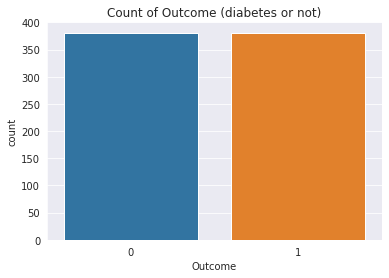

In [469]:
sns.countplot(x='Outcome', data=df_augmented_train)
plt.title("Count of Outcome (diabetes or not)")
plt.show()

In [470]:
y_train_aug = df_augmented_train["Outcome"]
x_train_aug = df_augmented_train.drop("Outcome",axis= 1)

x_train_aug.shape

(762, 8)

### 🤖 K-nn 

In [239]:
k_to_test = list(np.arange(1,50))
k_to_test[:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

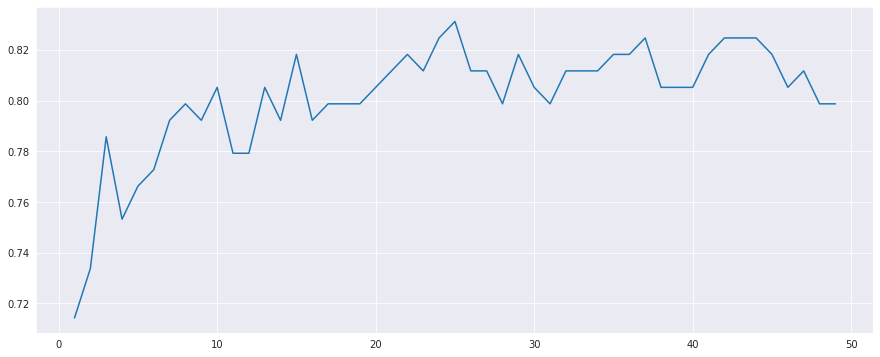

In [240]:
scores= []
for k in k_to_test:
    knn= KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train,y_train)
    scores.append(accuracy_score(y_test,knn.predict(x_test)))

plt.figure(figsize= (15,6))
sns.lineplot(k_to_test,scores)
plt.show()

In [204]:
best_k = np.argmax(scores) + 1
best_k

25

In [249]:
knn= KNeighborsClassifier(n_neighbors= best_k)
knn.fit(x_train,y_train)
knnpred = knn.predict(x_test)
print(f"accuracy score: ",accuracy_score(y_test,knnpred))

accuracy score:  0.7987012987012987


In [263]:
def classification_report_and_interpretation(y_test,y_pred, verbose = True):
    report = classification_report(y_test,y_pred)
    print(report)
    dict_report = classification_report(y_test,y_pred,output_dict=True)
    df_classification_report = pd.DataFrame(dict_report).transpose()
    #print(df_classification_report)

    
    accuracy = df_classification_report["f1-score"]["accuracy"]
    support_0 =  int(df_classification_report["support"][0])
    support_1 =  int(df_classification_report["support"][1])

    precision_0 = df_classification_report["precision"][0]
    precision_1 = df_classification_report["precision"][1]
    recall_0 = df_classification_report["recall"][0]
    recall_1 = df_classification_report["recall"][1]
    f1_score_0 = df_classification_report["f1-score"][0]
    f1_score_1 = df_classification_report["f1-score"][1]

    if verbose:
        print("---")
        print(f"Precision 0 : Of all the people that the model predicted had no diabetes, only {precision_0:.0%} actually has it.")
        print(f"Precision 1 : Of all the people that the model predicted had diabetes, only {precision_1:.0%} actually didn't have it.")
        
        print(f"Recall 0    : Of all the people with no diabetes [{support_0}], the model predicted this outcome correctly for {recall_0:.0%} of them.")
        print(f"Recall 1    : Of all the people with diabetes [{support_1}], the model predicted this outcome correctly for {recall_1:.0%} of them.")
        
        if f1_score_1 < 0.6:
            print("F1-Score : /!\ Since this value is not very close to 1, this tells us that the model does a poor job of predicting whether individuals have diabetes or not.")
        print("---")
    return accuracy, precision_1, recall_1 ,f1_score_1

accuracy_, _ , recall_, _ = classification_report_and_interpretation(y_test,knnpred)

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        96
           1       0.79      0.64      0.70        58

    accuracy                           0.80       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.80      0.80      0.79       154

---
Precision 0 : Of all the people that the model predicted had no diabetes, only 80% actually has it.
Precision 1 : Of all the people that the model predicted had diabetes, only 79% actually didn't have it.
Recall 0    : Of all the people with no diabetes [96], the model predicted this outcome correctly for 90% of them.
Recall 1    : Of all the people with diabetes [58], the model predicted this outcome correctly for 64% of them.
---


In [207]:
models_metrics_results.append({"model" : "KNN", "accuracy" : accuracy_, "recall" : recall_ })

### 🤖 Logistic Regression

In [208]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
lrpred= lr.predict(x_test)
print(f"accuracy score: ",accuracy_score(y_test,lrpred))

accuracy score:  0.8116883116883117


In [209]:
accuracy_, _ , recall_, _ = classification_report_and_interpretation(y_test,lrpred)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       100
           1       0.79      0.63      0.70        54

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154

              precision    recall  f1-score     support
0              0.819820  0.910000  0.862559  100.000000
1              0.790698  0.629630  0.701031   54.000000
accuracy       0.811688  0.811688  0.811688    0.811688
macro avg      0.805259  0.769815  0.781795  154.000000
weighted avg   0.809608  0.811688  0.805919  154.000000
---
Precision 0 : Of all the people that the model predicted had no diabetes, only 82% actually has it.
Precision 1 : Of all the people that the model predicted had diabetes, only 79% actually didn't have it.
Recall 0    : Of all the people with no diabetes [100], the model predicted this outcome correctly for 91% of them.
Recall 1    

In [210]:
models_metrics_results.append({"model" : "Logistic Regression", "accuracy" : accuracy_, "recall" : recall_ })

### 🤖 Random Forest

In [211]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
rfpred= rf.predict(x_test)
accuracy_score(y_test,rfpred)

0.7792207792207793

In [212]:
classification_report_and_interpretation(y_test,rfpred)

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       100
           1       0.70      0.65      0.67        54

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154

              precision    recall  f1-score     support
0              0.817308  0.850000  0.833333  100.000000
1              0.700000  0.648148  0.673077   54.000000
accuracy       0.779221  0.779221  0.779221    0.779221
macro avg      0.758654  0.749074  0.753205  154.000000
weighted avg   0.776174  0.779221  0.777140  154.000000
---
Precision 0 : Of all the people that the model predicted had no diabetes, only 82% actually has it.
Precision 1 : Of all the people that the model predicted had diabetes, only 70% actually didn't have it.
Recall 0    : Of all the people with no diabetes [100], the model predicted this outcome correctly for 85% of them.
Recall 1    

(0.7792207792207793, 0.7, 0.6481481481481481, 0.673076923076923)

#### hyperparams tuning...

In [213]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Voici une brève description des paramètres renvoyés par `rf.get_params()` dans un modèle `RandomForest` de `scikit-learn`:

- `bootstrap`: Indique si les arbres de la forêt aléatoire doivent être construits en utilisant la méthode bootstrap pour sélectionner les échantillons d'entraînement.
- `ccp_alpha`: Coefficient de complexité de pénalité pour la réduction de complexité dans les arbres.
- `class_weight`: Pondération des classes pour gérer les déséquilibres de classe dans les données d'entraînement.
- `criterion`: Fonction de coût utilisée pour faire des splits sur les nœuds dans les arbres.
- `max_depth`: Profondeur maximale de chaque arbre dans la forêt.
- `max_features`: Nombre maximal de caractéristiques à considérer pour faire des splits sur les nœuds dans les arbres.
- `max_leaf_nodes`: Nombre maximal de feuilles dans chaque arbre.
- `min_impurity_decrease`: Quantité minimale par laquelle l'impureté doit être réduite pour effectuer un split sur un nœud.
- `min_impurity_split`: Seuil d'impureté pour effectuer un split sur un nœud.
- `min_samples_leaf`: Nombre minimum d'échantillons requis pour être considéré comme une feuille dans un arbre.
- `min_samples_split`: Nombre minimum d'échantillons requis pour effectuer un split sur un nœud.
- `min_weight_fraction_leaf`: Fraction minimale de la somme totale des poids d'un nœud pour être considérée comme une feuille.
- `n_estimators`: Nombre d'arbres dans la forêt aléatoire.
- `n_jobs`: Nombre de cœurs à utiliser pour entraîner les arbres.
- `oob_score`: Indique si la méthode "out-of-bag" doit être utilisée pour évaluer la performance du modèle.
- `random_state`: Graine aléatoire utilisée pour initialiser les générateurs de nombres aléatoires.
- `verbose`: Niveau de verbosité pour les messages de sortie.
- `warm_start`: Indique si le modèle doit être réinitialisé entre les appels à `fit`.


In [214]:
#hyperparameter tuning
params={
    'max_depth': [50,80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50,100, 200]
}

L'argument `scoring` dans `GridSearchCV` définit la métrique utilisée pour évaluer les modèles et sélectionner les meilleurs hyperparamètres. 

In [215]:
grid_search = GridSearchCV(estimator = rf, param_grid = params,cv = 5, scoring='recall',verbose=True)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [50, 80, 90, 100], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [50, 100, 200]},
             scoring='recall', verbose=True)

In [216]:
grid_search.best_params_

{'max_depth': 50,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 100}

In [217]:
grid_search.best_score_

0.5982281284606865

L'attribut `.best_score_` de l'objet GridSearchCV est la meilleure moyenne de la validation croisée pour le modèle avec les meilleurs hyperparamètres trouvés. Cette moyenne est basée sur le score choisi lors de la définition de GridSearchCV en utilisant l'argument `scoring`.

In [218]:
# Construire un modèle RandomForest en utilisant les meilleurs hyperparamètres trouvés
best_rf = RandomForestClassifier(**grid_search.best_params_)

# Entraîner ce nouveau modèle sur toutes les données d'entraînement (pas seulement les données utilisées pour GridSearchCV)
best_rf.fit(x_train,y_train)
rfpred= best_rf.predict(x_test)
accuracy_score(y_test,rfpred)

0.7922077922077922

In [219]:
accuracy_, _ , recall_, _ = classification_report_and_interpretation(y_test,rfpred)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       100
           1       0.72      0.67      0.69        54

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

              precision    recall  f1-score     support
0              0.826923  0.860000  0.843137  100.000000
1              0.720000  0.666667  0.692308   54.000000
accuracy       0.792208  0.792208  0.792208    0.792208
macro avg      0.773462  0.763333  0.767722  154.000000
weighted avg   0.789431  0.792208  0.790249  154.000000
---
Precision 0 : Of all the people that the model predicted had no diabetes, only 83% actually has it.
Precision 1 : Of all the people that the model predicted had diabetes, only 72% actually didn't have it.
Recall 0    : Of all the people with no diabetes [100], the model predicted this outcome correctly for 86% of them.
Recall 1    

In [220]:
models_metrics_results.append({"model" : "Random Forest", "accuracy" : accuracy_, "recall" : recall_ })

In [261]:
rf.feature_importances_

array([0.08066582, 0.24588504, 0.08204671, 0.07916159, 0.09036413,
       0.15677624, 0.12895113, 0.13614934])

### 🤖 AdaBoost

In [221]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
adpred= ad.predict(x_test)
accuracy_score(y_test,adpred)

0.8181818181818182

In [222]:
classification_report_and_interpretation(y_test,adpred)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       100
           1       0.76      0.70      0.73        54

    accuracy                           0.82       154
   macro avg       0.80      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154

              precision    recall  f1-score     support
0              0.846154  0.880000  0.862745  100.000000
1              0.760000  0.703704  0.730769   54.000000
accuracy       0.818182  0.818182  0.818182    0.818182
macro avg      0.803077  0.791852  0.796757  154.000000
weighted avg   0.815944  0.818182  0.816468  154.000000
---
Precision 0 : Of all the people that the model predicted had no diabetes, only 85% actually has it.
Precision 1 : Of all the people that the model predicted had diabetes, only 76% actually didn't have it.
Recall 0    : Of all the people with no diabetes [100], the model predicted this outcome correctly for 88% of them.
Recall 1    

(0.8181818181818182, 0.76, 0.7037037037037037, 0.7307692307692308)

#### hyperparams tuning...

In [223]:
ad.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

Voici une brève description des paramètres renvoyés par `ad.get_params()` dans un modèle `AdaBoost` de `scikit-learn`:

- `algorithm`: Algorithme utilisé pour construire les classificateurs successifs, peut être "SAMME" ou "SAMME.R".
- `base_estimator`: Classificateur de base utilisé pour construire les classificateurs successifs.
- `learning_rate`: Taux d'apprentissage pour adapter les pondérations des classificateurs successifs.
- `n_estimators`: Nombre de classificateurs successifs utilisés pour construire le modèle final.
- `random_state`: Graine aléatoire utilisée pour initialiser les générateurs de nombres aléatoires.


In [224]:
#hyperparameter tuning
params={
   "learning_rate":[0.2,0.1,0.5,0.8,1.0],
   "n_estimators": [25,50,100,150,200]
}

In [225]:
grid_search = GridSearchCV(estimator = ad, param_grid = params,cv = 5, scoring='recall', verbose=True)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.1, 0.5, 0.8, 1.0],
                         'n_estimators': [25, 50, 100, 150, 200]},
             scoring='recall', verbose=True)

In [226]:
grid_search.best_score_

0.5654485049833887

In [227]:
grid_search.best_params_

{'learning_rate': 0.8, 'n_estimators': 25}

In [228]:
# Construire un modèle RandomForest en utilisant les meilleurs hyperparamètres trouvés
best_ad = AdaBoostClassifier(**grid_search.best_params_)

# Entraîner ce nouveau modèle sur toutes les données d'entraînement (pas seulement les données utilisées pour GridSearchCV)
best_ad.fit(x_train,y_train)
adpred= best_ad.predict(x_test)
accuracy_score(y_test,adpred)

0.8181818181818182

In [229]:
accuracy_, _ , recall_, _ = classification_report_and_interpretation(y_test,adpred)

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       100
           1       0.78      0.67      0.72        54

    accuracy                           0.82       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.82      0.82      0.81       154

              precision    recall  f1-score     support
0              0.833333  0.900000  0.865385  100.000000
1              0.782609  0.666667  0.720000   54.000000
accuracy       0.818182  0.818182  0.818182    0.818182
macro avg      0.807971  0.783333  0.792692  154.000000
weighted avg   0.815547  0.818182  0.814406  154.000000
---
Precision 0 : Of all the people that the model predicted had no diabetes, only 83% actually has it.
Precision 1 : Of all the people that the model predicted had diabetes, only 78% actually didn't have it.
Recall 0    : Of all the people with no diabetes [100], the model predicted this outcome correctly for 90% of them.
Recall 1    

In [230]:
models_metrics_results.append({"model" : "AdaBoost", "accuracy" : accuracy_, "recall" : recall_ })

### 🤖 GradientBoosting

In [231]:
gb= GradientBoostingClassifier()
gb.fit(x_train,y_train)
gbpred= gb.predict(x_test)
accuracy_score(y_test,gbpred)

0.8116883116883117

In [232]:
accuracy_, _ , recall_, _ = classification_report_and_interpretation(y_test,gbpred)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       100
           1       0.78      0.65      0.71        54

    accuracy                           0.81       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154

              precision    recall  f1-score     support
0              0.825688  0.900000  0.861244  100.000000
1              0.777778  0.648148  0.707071   54.000000
accuracy       0.811688  0.811688  0.811688    0.811688
macro avg      0.801733  0.774074  0.784157  154.000000
weighted avg   0.808888  0.811688  0.807183  154.000000
---
Precision 0 : Of all the people that the model predicted had no diabetes, only 83% actually has it.
Precision 1 : Of all the people that the model predicted had diabetes, only 78% actually didn't have it.
Recall 0    : Of all the people with no diabetes [100], the model predicted this outcome correctly for 90% of them.
Recall 1    

In [233]:
models_metrics_results.append({"model" : "GradientBoosting", "accuracy" : accuracy_, "recall" : recall_ })

### Lazy

In [257]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 18.61it/s]


In [258]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.81               0.80     0.80      0.81   
XGBClassifier                      0.79               0.78     0.78      0.79   
RandomForestClassifier             0.79               0.78     0.78      0.79   
ExtraTreesClassifier               0.79               0.77     0.77      0.78   
KNeighborsClassifier               0.77               0.76     0.76      0.77   
NearestCentroid                    0.76               0.76     0.76      0.76   
BaggingClassifier                  0.78               0.75     0.75      0.78   
LinearDiscriminantAnalysis         0.79               0.75     0.75      0.78   
LinearSVC                          0.79               0.75     0.75      0.78   
CalibratedClassifierCV             0.79               0.75     0.75      0.78   
QuadraticDiscriminantAnalysi


### Compare models

In [234]:
dx = pd.DataFrame(models_metrics_results)
dx.sort_values(by="recall",inplace=True, ascending=False)# sort by recall
dx

,model,accuracy,recall
0,KNN,0.831169,0.722222
2,Random Forest,0.792208,0.666667
3,AdaBoost,0.818182,0.666667
4,GradientBoosting,0.811688,0.648148
1,Logistic Regression,0.811688,0.629630


In [235]:
model_colors = px.colors.qualitative.Bold[0:len(dx)]
model_colors

['rgb(127, 60, 141)',
 'rgb(17, 165, 121)',
 'rgb(57, 105, 172)',
 'rgb(242, 183, 1)',
 'rgb(231, 63, 116)']

In [236]:
fig = go.Figure(go.Scatter(x=dx["recall"], y=dx["accuracy"], mode="markers",text=dx["model"],
    marker=dict(
        size=35,
        color=model_colors
    )))

fig.update_layout(
    title="Models performance",
    xaxis=dict(title="Recall", showgrid=False),
    yaxis=dict(title="Accuracy", showgrid=False),
    template="ggplot2"
)
fig.show()

Note : The scores and models can be further improved using hyperparameter tuning with different parameters

## 🥇 Model Selection : KNN

Parmi les 5 modèles, c'est le K-NN que j'ai sélectionné car

In [243]:
knn

KNeighborsClassifier(n_neighbors=49)

In [471]:
knn.fit(x_train,y_train)
init_accuracy, _ , recall_, _ = classification_report_and_interpretation(y_test,knn.predict(x_test))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       119
           1       0.77      0.64      0.70        73

    accuracy                           0.79       192
   macro avg       0.79      0.76      0.77       192
weighted avg       0.79      0.79      0.79       192

---
Precision 0 : Of all the people that the model predicted had no diabetes, only 80% actually has it.
Precision 1 : Of all the people that the model predicted had diabetes, only 77% actually didn't have it.
Recall 0    : Of all the people with no diabetes [119], the model predicted this outcome correctly for 88% of them.
Recall 1    : Of all the people with diabetes [73], the model predicted this outcome correctly for 64% of them.
---


In [472]:
knn.fit(x_train_aug,y_train_aug)
init_accuracy, _ , recall_, _ = classification_report_and_interpretation(y_test,knn.predict(x_test))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       119
           1       0.70      0.82      0.75        73

    accuracy                           0.80       192
   macro avg       0.79      0.80      0.79       192
weighted avg       0.81      0.80      0.80       192

---
Precision 0 : Of all the people that the model predicted had no diabetes, only 88% actually has it.
Precision 1 : Of all the people that the model predicted had diabetes, only 70% actually didn't have it.
Recall 0    : Of all the people with no diabetes [119], the model predicted this outcome correctly for 78% of them.
Recall 1    : Of all the people with diabetes [73], the model predicted this outcome correctly for 82% of them.
---


il est possible d'obtenir une approximation de **l'importance des variables** en effectuant une analyse en série sur chaque variable.

L'idée est de **mesurer l'impact sur les prédictions** lorsque vous retirez une variable à la fois. **Si l'exclusion d'une variable entraîne une baisse significative** de la performance du modèle, cela suggère que **cette variable est importante** pour la prédiction.

In [473]:
def vars_importance_analysis(model,x_train, y_train, x_test, y_test, metric_focus = "recall"):

    if metric_focus == "accuracy":
        score = accuracy_score
    elif metric_focus == "recall":
        score = recall_score
    elif metric_focus == "precision":
        score = precision_score
    else:
        score = accuracy_score
        metric_focus = "accuracy"


    knn.fit(x_train,y_train)
    init_accuracy = score(y_test, knn.predict(x_test))

    # l'accuracy initiale
    print(f"{metric_focus.capitalize()} initiale : {init_accuracy:.2f} " )

    # mesure de l'accuracy après l'exclusion de chaque feature
    mesures = {}
    for feature in x_train.columns:
        x_train_temp = x_train.drop(feature, axis=1)
        knn.fit(x_train_temp,y_train)

        x_test_temp = x_test.drop(feature, axis=1)
        accuracy_temp = score(y_test, knn.predict(x_test_temp))
        mesures[feature] = accuracy_temp 

    for feature, accuracy_temp in sorted(mesures.items(),key=lambda x: x[1]):
        p = (init_accuracy - accuracy_temp) / init_accuracy
        print(f"{metric_focus.capitalize()} après l'exclusion de la feature '{feature}' : {accuracy_temp:.2f} ({p :.1%})")
        
vars_importance_analysis(knn,x_train,y_train,x_test,y_test)

Recall initiale : 0.64 
Recall après l'exclusion de la feature 'Glucose' : 0.45 (29.8%)
Recall après l'exclusion de la feature 'BloodPressure' : 0.59 (8.5%)
Recall après l'exclusion de la feature 'Insulin' : 0.59 (8.5%)
Recall après l'exclusion de la feature 'SkinThickness' : 0.60 (6.4%)
Recall après l'exclusion de la feature 'BMI' : 0.60 (6.4%)
Recall après l'exclusion de la feature 'DiabetesPedigreeFunction' : 0.62 (4.3%)
Recall après l'exclusion de la feature 'Age' : 0.62 (4.3%)
Recall après l'exclusion de la feature 'Pregnancies' : 0.68 (-6.4%)


Le glucose est la variable la plus importante
ce qui n'est pas illogique

In [474]:
vars_importance_analysis(knn,x_train_aug,y_train_aug,x_test,y_test)

Recall initiale : 0.82 
Recall après l'exclusion de la feature 'Glucose' : 0.68 (16.7%)
Recall après l'exclusion de la feature 'Age' : 0.75 (8.3%)
Recall après l'exclusion de la feature 'BloodPressure' : 0.77 (6.7%)
Recall après l'exclusion de la feature 'SkinThickness' : 0.78 (5.0%)
Recall après l'exclusion de la feature 'Pregnancies' : 0.79 (3.3%)
Recall après l'exclusion de la feature 'Insulin' : 0.79 (3.3%)
Recall après l'exclusion de la feature 'BMI' : 0.82 (0.0%)
Recall après l'exclusion de la feature 'DiabetesPedigreeFunction' : 0.82 (0.0%)


#### Conclusion #Marketing

> Le modèle est très bon pour prédire les gens qui n'ont pas le diabète. J'imagine bien mon modèle être utiliser par les medecins car ils leurs permettra de gagner du temps en éliminant rapidement les gens qui n'ont pas de diabète pour sure.

# TODO

- sur le training afficher la vrai valeur et la prédiction pour voir les biais, voir ce qu'il arrive à bien classifier, esayer de comprendre pk ça il arrive bien a class, donne des pitestes : faire fct qui affiche les indivu là où il se trompte

voir important c des variables dans la construction des modèle, ar importance, VIP p

pas importante, donc plutot que eliminer


atttetin oversamplit alors que missing values  0qiuel ets le model quia rriv à elimitner le plus e pa=tin

mette le sueli le plus vbas possible pour etre de  
bouger le seuil pour afficher plus de1 quoi

